In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pycta.portfolio import Portfolio
from beakerx import *
from pycta.analysis import Analysis

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load prices
prices = pd.read_csv("data/prices.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
# take two moving averages and apply sign-functiond
def f(price, fast=32, slow=96):
    s = price.ewm(com=slow, min_periods=300).mean()
    f = price.ewm(com=fast, min_periods=300).mean()
    return np.sign(f-s)

In [4]:
form = EasyForm("Configuration")
form.addTextField("fast")
form.addTextField("slow")
form.addButton("Go!", tag="run")
form 

In [5]:
portfolio = Portfolio(prices=prices, position=prices.apply(f, fast=int(form["fast"] or 32), slow=int(form["slow"] or 96)))

In [6]:
a = Analysis(portfolio.nav())
a.performance

Performance number
Annua Return                        7.64
Annua Volatility                   16.03
Annua Sharpe Ratio (r_f = 0)        0.48
Max Drawdown                       60.55
Return                          3,590.06
Kurtosis                           34.56
dtype: object

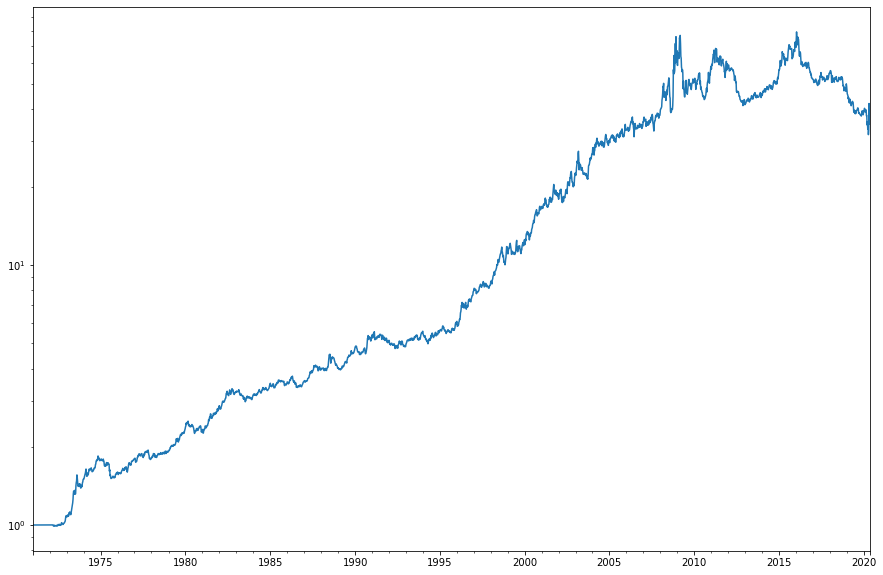

In [8]:
a.nav.plot(logy=True, figsize=(15,10))
plt.show()

In [ ]:
a.monthlytable

In [10]:
a.std.plot(kind="line", figsize=(15,10))
plt.show()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,STDev,YTD
Year,,,,,,,,,,,,,,
2020,0.48%,-3.36%,-9.98%,12.12%,-2.73%,,,,,,,,28.10%,-4.67%
2019,-8.80%,-2.85%,-1.45%,1.61%,-9.25%,-1.25%,1.24%,3.80%,-3.97%,-1.32%,2.98%,-1.51%,14.25%,-19.68%
2018,-0.66%,-4.14%,-0.00%,0.31%,-2.69%,0.90%,1.48%,2.03%,-1.50%,-7.62%,-2.04%,1.78%,9.77%,-11.90%
2017,-3.78%,3.56%,-4.20%,2.20%,2.61%,1.48%,-2.28%,1.00%,-1.28%,3.95%,-1.71%,3.92%,10.32%,5.10%
2016,2.26%,4.68%,-11.92%,-9.06%,-2.23%,1.39%,2.71%,-2.87%,2.55%,-7.51%,-3.28%,-2.92%,18.05%,-24.48%
2015,8.81%,-1.89%,9.60%,-7.92%,3.20%,-4.36%,15.81%,-4.77%,4.19%,-8.21%,6.94%,1.85%,26.21%,22.16%
2014,2.38%,2.49%,-0.35%,2.60%,-0.35%,0.03%,-0.62%,2.70%,2.51%,-2.27%,4.65%,8.24%,9.76%,23.85%
2013,2.34%,0.31%,0.34%,1.58%,2.54%,-1.64%,3.36%,-3.20%,0.23%,2.41%,2.03%,-1.35%,6.93%,9.08%
2012,0.01%,-2.29%,1.44%,-2.46%,-4.33%,-12.07%,-0.29%,-4.14%,-3.33%,-0.15%,-0.27%,-2.62%,12.16%,-27.12%


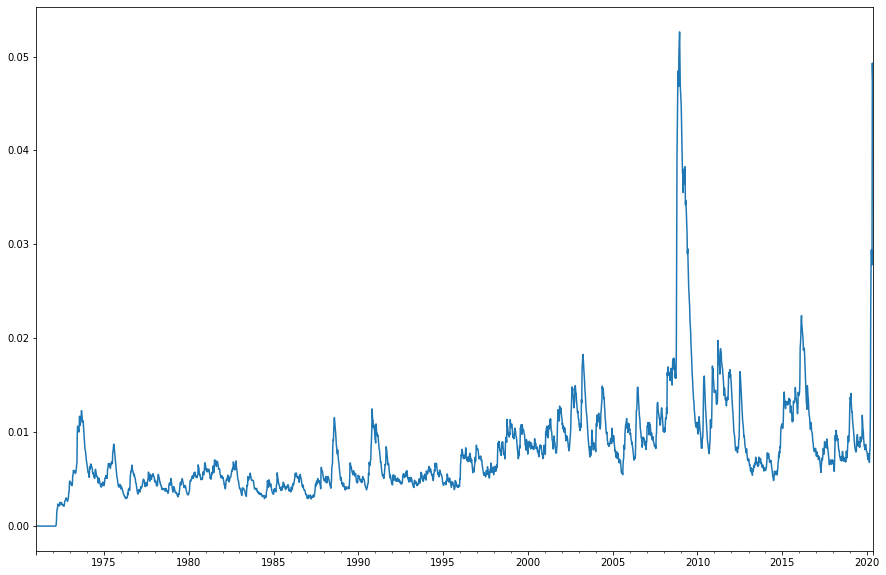

In [9]:
a.std.plot(kind="line", figsize=(15,10))
plt.show()

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position.
* Some hedge funds would argue that they are running 49 trading systems.
* Only 2 **free parameters** used here.
* Only 3 lines of code.

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position.
* Some hedge funds would argue that they are running 49 trading systems.
* Only 2 **free parameters** used here.
* Only 3 lines of code.

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position.
* Some hedge funds would argue that they are running 49 trading systems.
* Only 2 **free parameters** used here.
* Only 3 lines of code.

Results do not look terrible but...
* No concept of risk integrated. 
* The size of each bet is constant regardless of the underlying asset.
* The system lost its mojo in 2009 and has never really recovered.
* The sign function is very expensive to trade as position changes are too extreme.

Such fundamental flaws are not addressed by **parameter-hacking** or **pimp-my-trading-system** steps (remove the worst performing assets, insane quantity of stop-loss limits, ...)

In [ ]:
prices.transpose().reset_index(drop=True).transpose().to_csv("data/p_ob.csv")